In [1]:
# Step1: Import required packages
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("seeds.csv")
df.head(10)

,area A,perimeter P,compactness C = 4*pi*A/P^,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove.,S,T
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,NaN
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,NaN
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,NaN
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,NaN
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,NaN


In [3]:
df.nunique()

area A                       193
perimeter P                  170
compactness C = 4*pi*A/P^    186
length of kernel             188
width of kernel              184
asymmetry coefficient        207
length of kernel groove.     148
S                              3
T                              0
dtype: int64

In [4]:
df.drop(['T'], axis = 1, inplace = True)

In [5]:
df.isnull().any()

area A                       False
perimeter P                  False
compactness C = 4*pi*A/P^    False
length of kernel             False
width of kernel              False
asymmetry coefficient        False
length of kernel groove.     False
S                            False
dtype: bool

In [6]:
smin = 1
smax = 3
CLmin = 0.000001
CLmax = 10000000


df = df[df['S'].between(smin, smax)]
df = df[df['compactness C = 4*pi*A/P^'].between(CLmin, CLmax)]
df = df[df['width of kernel'].between(CLmin, CLmax)]




In [7]:
df.nunique()

area A                       193
perimeter P                  170
compactness C = 4*pi*A/P^    186
length of kernel             188
width of kernel              184
asymmetry coefficient        207
length of kernel groove.     148
S                              3
dtype: int64

In [8]:
np.round(df.describe())

,area A,perimeter P,compactness C = 4*pi*A/P^,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove.,S
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,15.0,15.0,1.0,6.0,3.0,4.0,5.0,2.0
std,3.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
min,11.0,12.0,1.0,5.0,3.0,1.0,5.0,1.0
25%,12.0,13.0,1.0,5.0,3.0,3.0,5.0,1.0
50%,14.0,14.0,1.0,6.0,3.0,4.0,5.0,2.0
75%,17.0,16.0,1.0,6.0,4.0,5.0,6.0,3.0
max,21.0,17.0,1.0,7.0,4.0,8.0,7.0,3.0


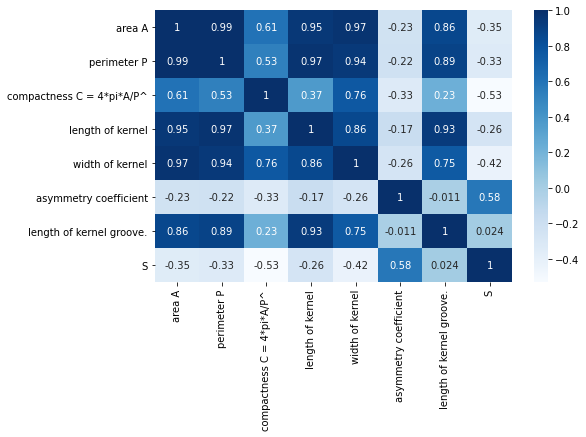

In [9]:
c = df.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(c,annot=True, cmap = "Blues");

In [10]:
skewValue = df.skew(axis=0)
print(skewValue)

area A                       0.399889
perimeter P                  0.386573
compactness C = 4*pi*A/P^   -0.537954
length of kernel             0.525482
width of kernel              0.134378
asymmetry coefficient        0.401667
length of kernel groove.     0.561897
S                            0.000000
dtype: float64


In [11]:
crmt = df.corr()
crmt["S"].sort_values(ascending=False)


S                            1.000000
asymmetry coefficient        0.577273
length of kernel groove.     0.024301
length of kernel            -0.257269
perimeter P                 -0.327900
area A                      -0.346058
width of kernel             -0.423463
compactness C = 4*pi*A/P^   -0.531007
Name: S, dtype: float64

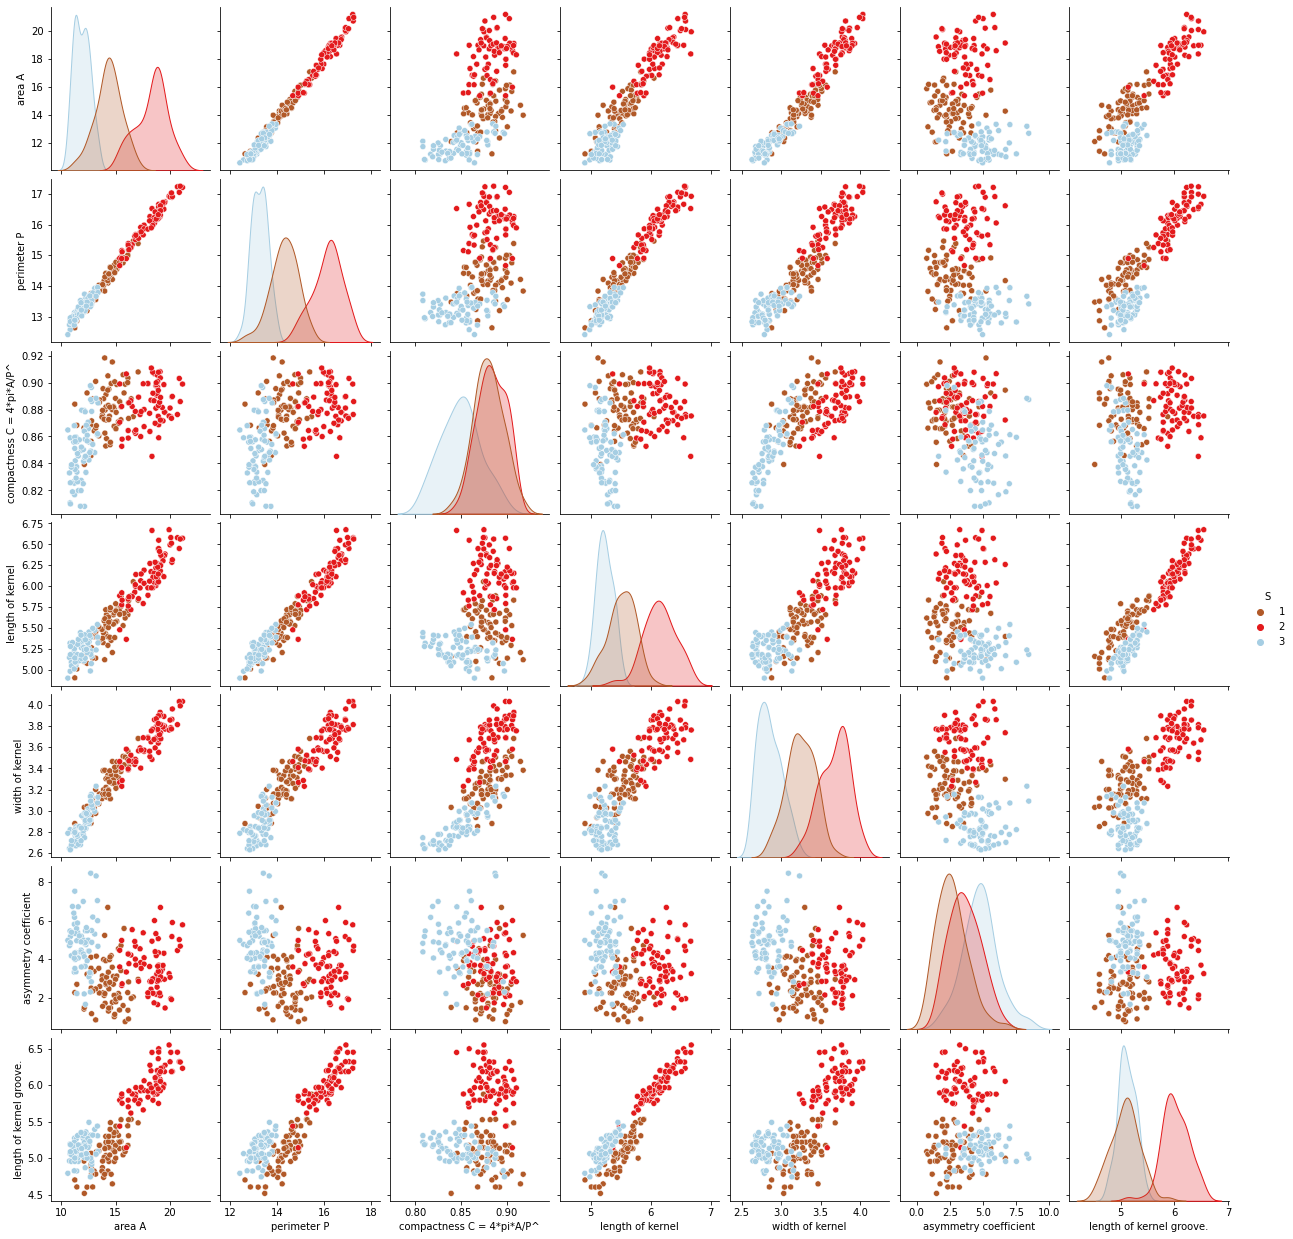

In [12]:
sns.pairplot(df, hue = 'S', palette = 'Paired_r')

In [13]:
#Splitting data to train
test = df["S"]
train = df.drop(["S"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    test, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

#print(X_train.shape[0])
#print(X_test.shape[0])

In [16]:
from sklearn.linear_model import LogisticRegression

ml = linear_model.LogisticRegression(C=100, max_iter=10000, multi_class='auto', penalty='l2', solver='liblinear')
ml.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000, solver='liblinear')

In [17]:
y_pred = ml.predict(X_test)
y_pred

array([1, 3, 2, 1, 1, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2],
      dtype=int64)

In [18]:
score = ml.score(X_test, y_test)
print(score)
print((metrics.classification_report(y_test, y_pred)))

0.9841269841269841
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.98        22

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



In [19]:
cf_matrix1 = confusion_matrix(y_test, y_pred)

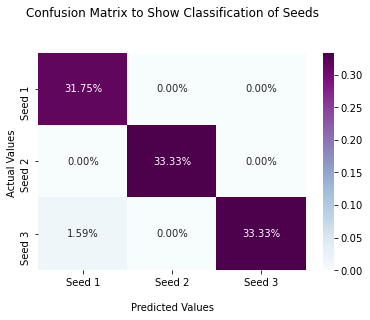

In [20]:
ax = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Confusion Matrix to Show Classification of Seeds\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])
ax.yaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
param_grid = [
    {'penalty': ['l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [10000],
    'C': [10, 100]}
]


optimal_params = GridSearchCV(LogisticRegression(),param_grid, cv=10, scoring = 'accuracy' )
optimal_params.fit(X_train, y_train)

print(optimal_params.best_params_)

{'C': 100, 'max_iter': 10000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\frees\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\frees\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\frees\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\frees\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [26]:
classifier = svm.SVC(C=1000,gamma=0.1, kernel="rbf")
classifier.fit(X_train, y_train)

SVC(C=1000, gamma=0.1)

In [23]:
prediction = classifier.predict(X_test)
prediction

array([1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2],
      dtype=int64)

In [24]:
print(metrics.accuracy_score(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

0.9841269841269841
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.98        22

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



In [25]:
param_grid = [
    {'C': [0.5, 1, 10, 100, 1000],
    'gamma': ['auto','scale', 1, 0.1, 0.01, 0.001],
    'kernel': ['poly','rbf']}
]


optimal_params = GridSearchCV(SVC(),param_grid, cv=10, scoring = 'accuracy' )
optimal_params.fit(X_train, y_train)

print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
cf_matrix = confusion_matrix(y_test, prediction)

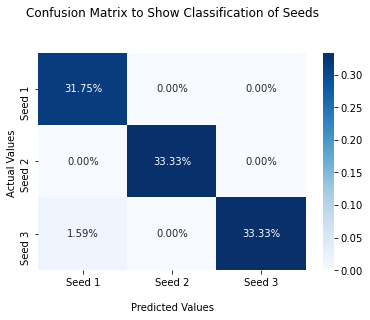

In [28]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix to Show Classification of Seeds\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])
ax.yaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])

## Display the visualization of the Confusion Matrix.
plt.show()